In [37]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KDTree
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
sys.path.append('/home/sanket/MS_Thesis/Pointwise-segmentation/kitti_data')
from dataset_iterator import Kitti_data_iterator

/home/sanket/.local/lib/python3.5/site-packages/vispy/visuals/isocurve.py:22: UserWarning: VisPy is not yet compatible with matplotlib 2.2+
  warnings.warn("VisPy is not yet compatible with matplotlib 2.2+")


In [39]:
basedir = '/media/sanket/My Passport/Sanket/Kitti/training'
dataset_iterator = Kitti_data_iterator(basedir, batch_size = 2, num_points = 60000)
data, label , iter , batch_no= dataset_iterator.get_batch()

In [40]:
print ('Data shape : ', data.shape)

Data shape :  (2, 60000, 4)


In [41]:
tree = [ KDTree(data[i], leaf_size=2) for i in range(len(data))]  

In [43]:
data_ = [tree[i].query(data[i], k= 30) for i in range(len(data))]

In [28]:
knn  = np.array(knn)
print ('Knn shape : ', knn.shape)

Knn shape :  (60000, 30)


In [45]:
data_= np.array(data_)
print (data_.shape)

(2, 2, 60000, 30)


In [59]:
data_ = data_.astype(int)

In [60]:
nn_pts = [data[i][data_[i][1]] for i in range(len(data))]

In [62]:
nn_pts =  np.array(nn_pts)

In [63]:
nn_pts.shape

(2, 60000, 30, 4)

In [71]:
def find_nearest_neighbors(data, k = 20):
    tree = [ KDTree(data[i], leaf_size=100) for i in range(len(data))]  
    data_ = [tree[i].query(data[i], k= 30) for i in range(len(data))]
    nn_pts = [data[i][data_[i][1]] for i in range(len(data))]
    nn_pts =  np.array(nn_pts)
    return nn_pts

In [92]:
pts1 = convert_data_to_knn(data, k = 30)

In [75]:
pts.shape

(2, 60000, 30, 4)

In [73]:
data = np.array(data)

In [89]:
def find_nearest_neighbors_diff(data, k = 20):
    tree = [ KDTree(data[i], leaf_size=100) for i in range(len(data))]  
    data_ = [tree[i].query(data[i], k= 30) for i in range(len(data))]
    nn_pts = [ data[i][:,np.newaxis] - data[i][data_[i][1]]  for i in range(len(data))]
    nn_pts =  np.array(nn_pts)
    return nn_pts

In [93]:
pts2 = find_nearest_neighbors_diff(data, k = 30)

In [91]:
pts.shape

(2, 60000, 30, 4)

KeyboardInterrupt: 

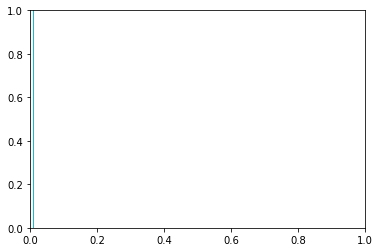

In [97]:
plt.hist(pts1[:,:,-1,-1])

In [ ]:
plt.hist(pts2[:,:,-1,-1])